In [18]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from scipy.ndimage.filters import convolve
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Toni\AppData\Local\Temp\ipykernel_35684\1969815966.py:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


# Image Processing

In [2]:
tiger_image = imread("data/tiger.jpg")

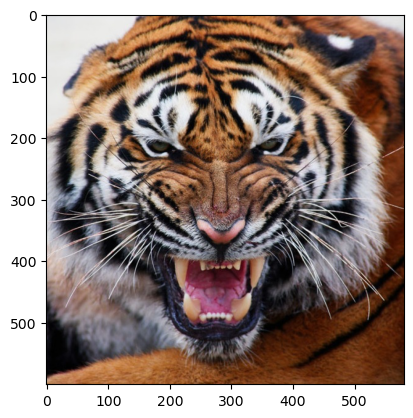

In [5]:
plt.imshow(tiger_image)

In [10]:
red = tiger_image[:, :, 0]
green = tiger_image[:, :, 1]
blue = tiger_image[:, :, 2]

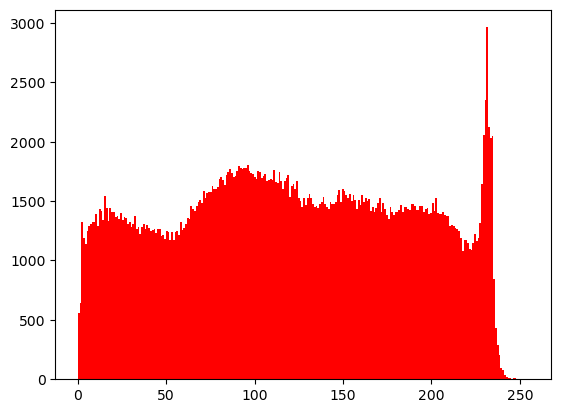

In [14]:
plt.hist(red.ravel(), bins = 256, color = "red")
plt.show()

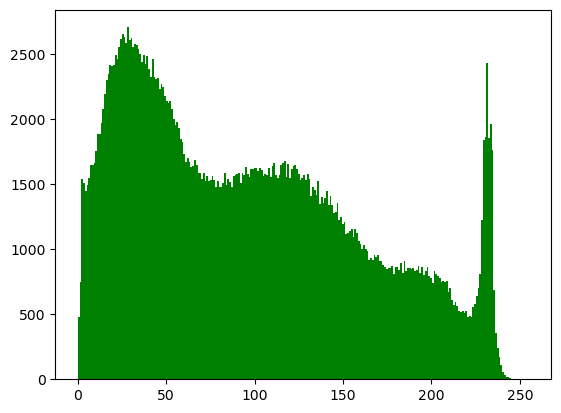

In [15]:
plt.hist(green.ravel(), bins = 256, color = "green")
plt.show()

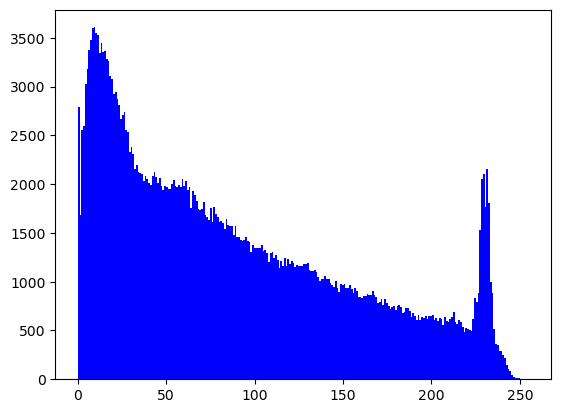

In [16]:
plt.hist(blue.ravel(), bins = 256, color = "blue")
plt.show()

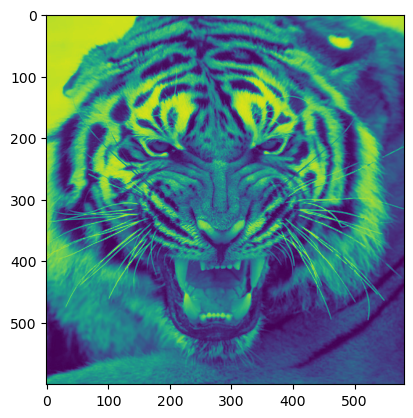

In [19]:
# Converting to grayscale
tiger_grayscale = 0.299 * red + 0.587 * green + 0.114 * blue
plt.imshow(tiger_grayscale)

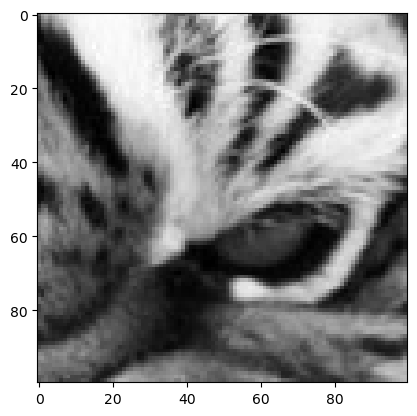

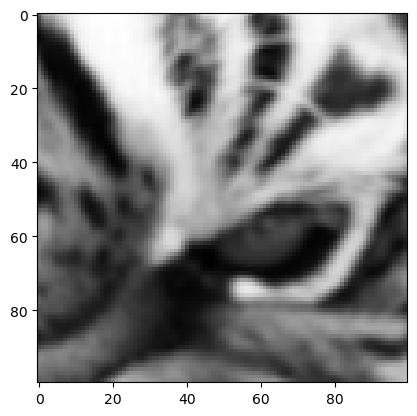

In [24]:
box_blur_kernel = np.array([
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1]
]) 

blurred = convolve(tiger_grayscale, box_blur_kernel)
plt.imshow(tiger_grayscale[150:250, 300:400], cmap = "gray")
plt.show()
plt.imshow(blurred[150:250, 300:400], cmap = "gray")
plt.show()

# Text Processing

In [27]:
text = ""
with open("data/alice.txt", "r", encoding = "utf-8") as f:
    text = f.read()
print(len(text))

164108


In [31]:
char_counter = Counter(text)
char_counter

Counter({' ': 29580,
         'e': 15243,
         't': 11754,
         'o': 9348,
         'a': 9172,
         'n': 7926,
         'i': 7881,
         'h': 7669,
         's': 7054,
         'r': 6481,
         'd': 5275,
         'l': 5111,
         'u': 3926,
         'c': 2843,
         'g': 2766,
         'w': 2725,
         ',': 2566,
         'y': 2489,
         'm': 2272,
         '\n': 2266,
         'f': 2259,
         'p': 1805,
         '’': 1768,
         'b': 1638,
         '.': 1217,
         'k': 1209,
         '‘': 1116,
         'v': 945,
         'I': 788,
         'A': 674,
         'T': 487,
         '!': 451,
         '—': 264,
         ':': 255,
         'H': 246,
         'W': 231,
         'S': 226,
         '-': 223,
         'j': 222,
         'D': 216,
         '?': 203,
         'E': 198,
         'M': 197,
         ';': 194,
         'C': 185,
         'P': 183,
         'G': 182,
         'x': 169,
         'R': 167,
         'O': 148,
         'N': 140,


In [32]:
char_count.most_common(20)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('c', 2843),
 ('g', 2766),
 ('w', 2725),
 (',', 2566),
 ('y', 2489),
 ('m', 2272),
 ('\n', 2266)]

In [35]:
word_counter = Counter(re.split("\W+", text))

In [36]:
word_counter

Counter({'the': 1693,
         'and': 875,
         'to': 802,
         'a': 677,
         'of': 609,
         'I': 546,
         'it': 543,
         'she': 513,
         'said': 458,
         'in': 416,
         'you': 408,
         'Alice': 401,
         'was': 357,
         'that': 299,
         'as': 256,
         'her': 245,
         'with': 223,
         'at': 218,
         't': 217,
         's': 214,
         'on': 200,
         'all': 194,
         'had': 178,
         'be': 164,
         'for': 161,
         'not': 155,
         'this': 154,
         'or': 148,
         'very': 140,
         'but': 137,
         'they': 133,
         'is': 131,
         'little': 127,
         'The': 125,
         'so': 125,
         'out': 118,
         'he': 107,
         'up': 101,
         'about': 101,
         'one': 100,
         'what': 99,
         'down': 99,
         'his': 95,
         'them': 88,
         'know': 88,
         'were': 85,
         'like': 84,
         'Project': 8

In [8]:
# Getting and removing stopwords
nltk.download("stopwords")
stop = set(stopwords.words("english"))
sentence = "this is a foo bar sentence"
print([w for w in sentence.lower().split() if w not in stop])

['foo', 'bar', 'sentence']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Stemming - Porter's algorithm
stemmer = PorterStemmer()
words = ["caresses", "flies", "dies", "seizing", "itemization", "sensational", "traditional", "reference", "plotted"]
print([stemmer.stem(word) for word in words])

['caress', 'fli', 'die', 'seiz', 'item', 'sensat', 'tradit', 'refer', 'plot']


In [16]:
# Using TF –IDF
newsgroups = fetch_20newsgroups()

In [22]:
tfidf = TfidfVectorizer(input = "content", analyzer = "word", ngram_range = (1, 4), min_df = 0, stop_words = list(stop), sublinear_tf = True)
tfidf_matrix = tfidf.fit_transform(newsgroups.data)

In [24]:
feature_names = tfidf.get_feature_names_out()

In [27]:
doc = 0 # Change the index to view another document
feature_index = tfidf_matrix[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in[(feature_names[i], s) for(i, s) in tfidf_scores]:
 print(w, s)

il brought neighborhood lerxst 0.07219586632049384
thanks il brought neighborhood 0.07219586632049384
mail thanks il brought 0.07219586632049384
please mail thanks il 0.07219586632049384
car please mail thanks 0.07219586632049384
looking car please mail 0.06915949020149523
funky looking car please 0.06915949020149523
info funky looking car 0.06915949020149523
whatever info funky looking 0.06915949020149523
history whatever info funky 0.06915949020149523
made history whatever info 0.06915949020149523
car made history whatever 0.06915949020149523
production car made history 0.06915949020149523
years production car made 0.06915949020149523
specs years production car 0.06915949020149523
engine specs years production 0.06915949020149523
name engine specs years 0.06915949020149523
model name engine specs 0.06915949020149523
tellme model name engine 0.06915949020149523
anyone tellme model name 0.06915949020149523
know anyone tellme model 0.06915949020149523
body know anyone tellme 0.069159490